In [1]:
import pandas as pd
import numpy as np

In [3]:
cal_housing = pd.read_csv('../cal_housing.xls')
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [7]:
n_samples , n_features = cal_housing.shape
missing_rate = 0.75
n_missing_samples = int(n_samples * missing_rate)
n_missing_samples

15480

In [8]:
missing_samples = np.zeros(n_samples, dtype=bool)
print(missing_samples.shape, missing_samples)

(20640,) [False False False ... False False False]


In [9]:
missing_samples[:n_missing_samples] = True

In [14]:
rng = np.random.default_rng(42)
rng.shuffle(missing_samples)
print(missing_samples.shape, missing_samples)

(20640,) [False  True  True ...  True  True  True]


In [12]:
missing_features = rng.integers(0, n_features, n_missing_samples)
print(missing_features.shape, missing_features)

(15480,) [4 3 1 ... 7 2 1]


In [15]:
cal_housing.values[missing_samples, missing_features] = np.nan
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,NaN,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,NaN,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,NaN,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [16]:
cal_housing['totalRooms'].isna()

0        False
1        False
2         True
3        False
4        False
         ...  
20635    False
20636     True
20637    False
20638    False
20639    False
Name: totalRooms, Length: 20640, dtype: bool

In [17]:
cal_housing['latitude'].notna()

0         True
1         True
2         True
3         True
4        False
         ...  
20635     True
20636     True
20637     True
20638     True
20639    False
Name: latitude, Length: 20640, dtype: bool

In [18]:
cal_housing['latitude'].isna().sum()

1680

In [19]:
cal_housing[cal_housing['medianHouseValue'].notna()]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,NaN,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,NaN,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,NaN,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [20]:
cal_housing.dropna()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0
22,-122.27,37.84,52.0,2436.0,541.0,1015.0,478.0,1.7250,113900.0
27,-122.28,37.85,52.0,1898.0,421.0,1102.0,397.0,1.8080,105500.0
...,...,...,...,...,...,...,...,...,...
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0


In [22]:
cal_housing.dropna(subset=['medianHouseValue', 'medianIncome'])

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,NaN,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,NaN,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,NaN,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,NaN,2.5495,98300.0
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [23]:
cal_housing.fillna(0)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,0.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,0.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,0.00,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,0.00,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,0.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,0.0000,92300.0
20638,-121.32,39.43,0.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [24]:
cal_housing[['medianIncome', 'medianHouseValue']].fillna(0)

,medianIncome,medianHouseValue
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,0.0000,92300.0
20638,1.8672,84700.0


In [25]:
cal_housing.fillna(cal_housing.mean())

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.0,126.0,8.325200,452600.0
1,-122.220000,37.860000,21.000000,7099.000000,536.876755,2401.0,1138.0,8.301400,358500.0
2,-122.240000,37.850000,52.000000,2637.112355,190.000000,496.0,177.0,7.257400,352100.0
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.0,219.0,5.643100,341300.0
4,-122.250000,35.626755,52.000000,1627.000000,280.000000,565.0,259.0,3.846200,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-119.576427,39.480000,25.000000,1665.000000,374.000000,845.0,330.0,1.560300,78100.0
20636,-121.210000,39.490000,18.000000,2637.112355,150.000000,356.0,114.0,2.556800,77100.0
20637,-121.220000,39.430000,17.000000,2254.000000,485.000000,1007.0,433.0,3.864801,92300.0
20638,-121.320000,39.430000,28.647348,1860.000000,409.000000,741.0,349.0,1.867200,84700.0


In [26]:
cal_housing.fillna(cal_housing.mean()["medianIncome":"medianHouseValue"])

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.325200,452600.0
1,-122.22,37.86,21.0,7099.0,NaN,2401.0,1138.0,8.301400,358500.0
2,-122.24,37.85,52.0,NaN,190.0,496.0,177.0,7.257400,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.643100,341300.0
4,-122.25,NaN,52.0,1627.0,280.0,565.0,259.0,3.846200,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.560300,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.556800,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,3.864801,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.867200,84700.0


In [27]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    columns=["a", "b", "c"],
)
df

,a,b,c
0,-0.825415,1.013835,-0.118735
1,-1.206027,-1.848593,-2.258199
2,0.167651,-0.540567,1.089862
3,0.226054,0.058047,1.530856
4,-0.732197,1.088729,-0.054353


In [29]:
np.random.seed(0)
nan_mask = np.where(np.random.randint(low=0, high=1+1, size=(5, 3)) == 1, 0, np.nan )
nan_mask

array([[nan,  0.,  0.],
       [nan,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0., nan],
       [nan,  0., nan]])

In [30]:
df

,a,b,c
0,-0.825415,1.013835,-0.118735
1,-1.206027,-1.848593,-2.258199
2,0.167651,-0.540567,1.089862
3,0.226054,0.058047,1.530856
4,-0.732197,1.088729,-0.054353


In [31]:
df = df + nan_mask
df

,a,b,c
0,NaN,1.013835,-0.118735
1,NaN,-1.848593,-2.258199
2,0.167651,-0.540567,1.089862
3,0.226054,0.058047,NaN
4,NaN,1.088729,NaN


In [32]:
df.a + df.b

0         NaN
1         NaN
2   -0.372916
3    0.284101
4         NaN
dtype: float64

In [33]:
df.fillna(method='pad')

,a,b,c
0,NaN,1.013835,-0.118735
1,NaN,-1.848593,-2.258199
2,0.167651,-0.540567,1.089862
3,0.226054,0.058047,1.089862
4,0.226054,1.088729,1.089862


In [34]:
df.fillna(method='bfill')

,a,b,c
0,0.167651,1.013835,-0.118735
1,0.167651,-1.848593,-2.258199
2,0.167651,-0.540567,1.089862
3,0.226054,0.058047,NaN
4,NaN,1.088729,NaN


In [37]:
steps = np.random.randint(-1, 2, size=365)
steps


array([ 0,  1, -1,  1, -1,  1, -1, -1,  1,  0, -1,  1, -1, -1,  1, -1,  0,
        1, -1,  1,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1, -1,  0,  0,  1,
        0, -1,  1,  0, -1,  0,  1,  0,  1,  1,  0,  1,  1,  1,  1,  0,  1,
        1,  1,  1, -1,  0,  0, -1,  0, -1,  0,  0,  1, -1, -1,  0, -1,  1,
        0,  0,  1, -1, -1,  0,  0,  1, -1, -1, -1,  1,  1,  0,  0,  0,  0,
       -1, -1, -1, -1,  1,  1, -1,  0, -1,  0,  1,  1,  0, -1, -1,  0, -1,
       -1,  1,  0, -1,  1, -1, -1,  0, -1,  1, -1,  0, -1, -1,  0, -1, -1,
        0, -1,  1, -1, -1,  0,  0,  0,  0, -1,  1,  1,  1,  0, -1, -1, -1,
        1,  1,  0,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  0,  0, -1,
        0, -1,  0,  0,  0, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0, -1,  1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  0,  1,  0,  0, -1, -1,  0,
       -1,  1,  1,  0,  0,  1,  1,  0,  1, -1, -1,  0, -1,  0, -1, -1,  0,
        1,  0,  0,  1, -1,  0,  0,  0, -1, -1,  1,  0,  1,  1,  0,  0,  1,
       -1,  1, -1, -1,  1

In [39]:
data = steps.cumsum()
data

array([ 0,  1,  0,  1,  0,  1,  0, -1,  0,  0, -1,  0, -1, -2, -1, -2, -2,
       -1, -2, -1,  0,  0,  1,  2,  3,  4,  5,  4,  5,  4,  3,  3,  3,  4,
        4,  3,  4,  4,  3,  3,  4,  4,  5,  6,  6,  7,  8,  9, 10, 10, 11,
       12, 13, 14, 13, 13, 13, 12, 12, 11, 11, 11, 12, 11, 10, 10,  9, 10,
       10, 10, 11, 10,  9,  9,  9, 10,  9,  8,  7,  8,  9,  9,  9,  9,  9,
        8,  7,  6,  5,  6,  7,  6,  6,  5,  5,  6,  7,  7,  6,  5,  5,  4,
        3,  4,  4,  3,  4,  3,  2,  2,  1,  2,  1,  1,  0, -1, -1, -2, -3,
       -3, -4, -3, -4, -5, -5, -5, -5, -5, -6, -5, -4, -3, -3, -4, -5, -6,
       -5, -4, -4, -3, -2, -1,  0, -1,  0,  1,  2,  3,  4,  5,  5,  5,  4,
        4,  3,  3,  3,  3,  2,  1,  1,  1,  0, -1, -1, -1, -1, -1, -2, -1,
       -2, -3, -2, -1, -2, -3, -2, -1,  0, -1, -1,  0,  0,  0, -1, -2, -2,
       -3, -2, -1, -1, -1,  0,  1,  1,  2,  1,  0,  0, -1, -1, -2, -3, -3,
       -2, -2, -2, -1, -2, -2, -2, -2, -3, -4, -3, -3, -2, -1, -1, -1,  0,
       -1,  0, -1, -2, -1

In [42]:
ts = pd.Series(data=data, index=pd.date_range(start='2021-01-01', end='2021-12-31', freq='D'))
ts

2021-01-01    0
2021-01-02    1
2021-01-03    0
2021-01-04    1
2021-01-05    0
             ..
2021-12-27    7
2021-12-28    6
2021-12-29    5
2021-12-30    6
2021-12-31    5
Freq: D, Length: 365, dtype: int64

<AxesSubplot:>

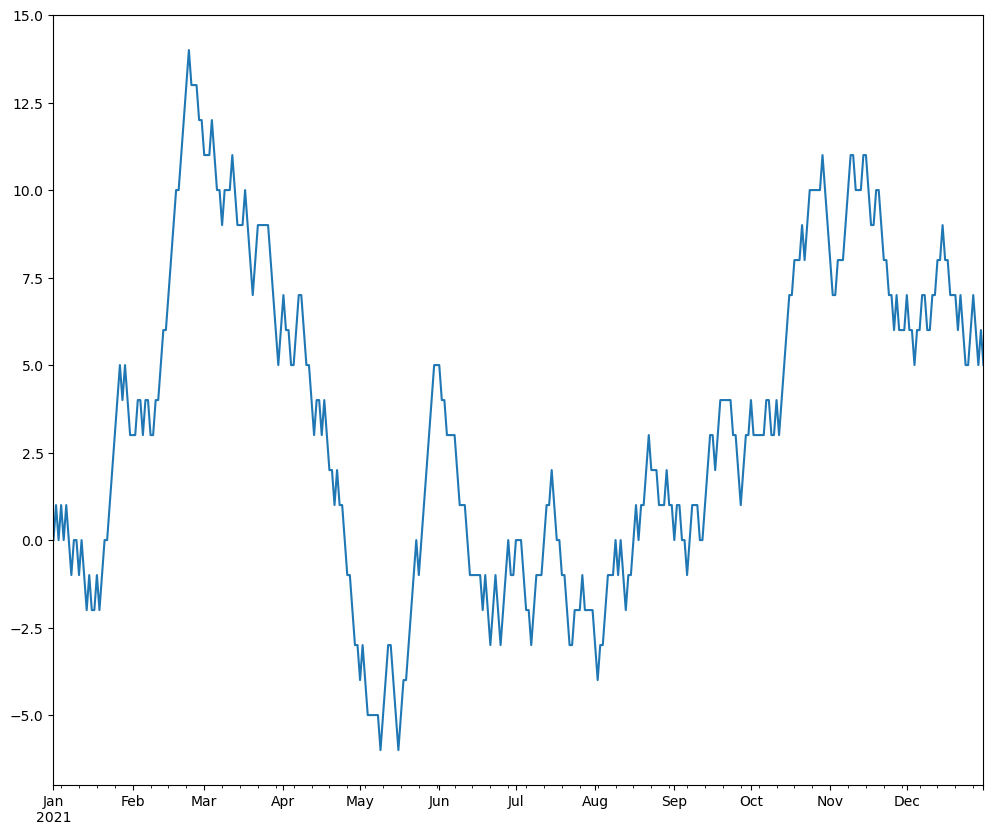

In [47]:
ts.plot(figsize=(12, 10))


In [48]:
nan_mask = np.where(np.random.randint(0, 2, 365) == 1, 0, np.nan)
ts = ts + nan_mask
ts

2021-01-01    0.0
2021-01-02    1.0
2021-01-03    0.0
2021-01-04    1.0
2021-01-05    0.0
             ... 
2021-12-27    NaN
2021-12-28    NaN
2021-12-29    NaN
2021-12-30    6.0
2021-12-31    NaN
Freq: D, Length: 365, dtype: float64

In [49]:
print(ts.isna().sum())

181


<AxesSubplot:>

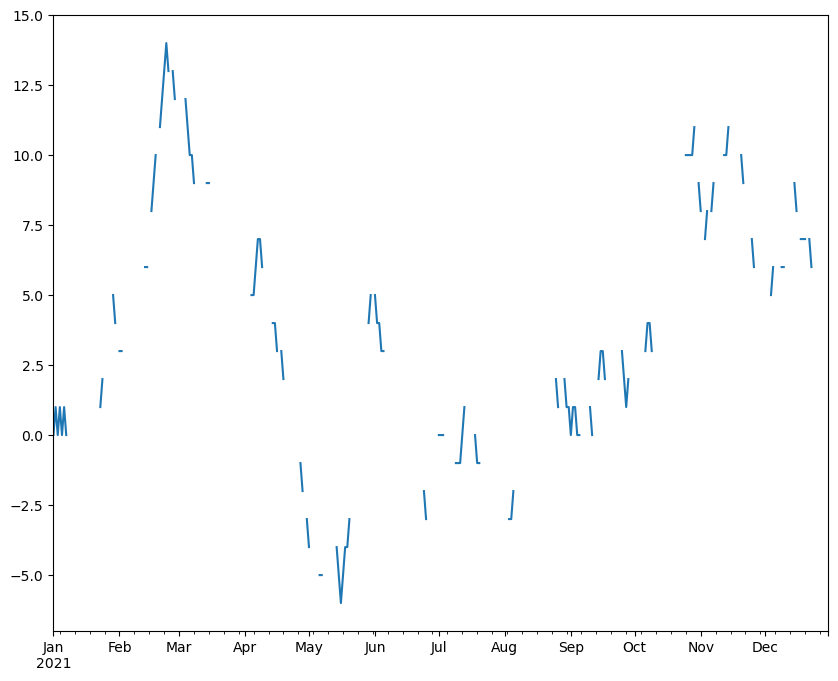

In [50]:
ts.plot(figsize=(10, 8))

In [51]:
ts = ts.interpolate()
ts

2021-01-01    0.0
2021-01-02    1.0
2021-01-03    0.0
2021-01-04    1.0
2021-01-05    0.0
             ... 
2021-12-27    5.4
2021-12-28    5.6
2021-12-29    5.8
2021-12-30    6.0
2021-12-31    6.0
Freq: D, Length: 365, dtype: float64

<AxesSubplot:>

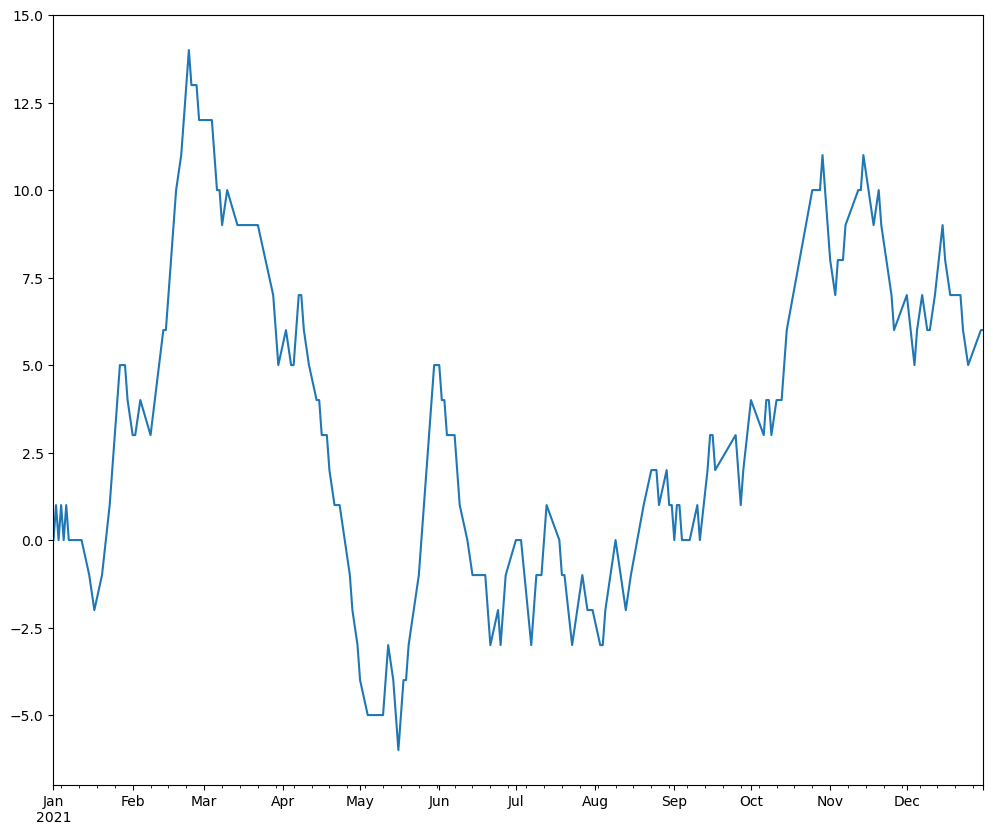

In [52]:
ts.plot(figsize=(12,10))

In [53]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)

In [54]:
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,NaN,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,NaN,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,NaN,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [56]:
cal_housing['totalBedrooms'].values.reshape(-1, 1)

array([[129.],
       [ nan],
       [190.],
       ...,
       [485.],
       [409.],
       [616.]])

In [57]:
imputer.fit_transform(cal_housing['totalBedrooms'].values.reshape(-1, 1))

array([[129.],
       [  0.],
       [190.],
       ...,
       [485.],
       [409.],
       [616.]])

In [58]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median", add_indicator=True)
imputer.fit_transform(cal_housing['totalBedrooms'].values.reshape(-1, 1))

array([[129.,   0.],
       [434.,   1.],
       [190.,   0.],
       ...,
       [485.,   0.],
       [409.,   0.],
       [616.,   0.]])